In [1]:
import pandas as pd
df = pd.read_csv("merged_dataset.csv")
df

,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
32332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
32333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
32334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
32335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [2]:
missing_values = df.isnull().sum()
missing_values

,0
Text,0
Language,0


In [3]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 207


# Data Preprocessing

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re

# Load the dataset
data = pd.read_csv('merged_dataset.csv')

# Step 1: Remove duplicates based on the 'Text' column
data_cleaned = data.drop_duplicates()
# Step 2: Convert the 'Text' column to lowercase and remove extra white spaces using regex
def cleaned_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces and newlines
    text = re.sub(r'[^\w\s.,!?-]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.strip()  # Remove leading/trailing whitespace
    return text
data_cleaned['Text'] = data_cleaned['Text'].apply(cleaned_text)
# Step 3: Initialize LabelEncoder and encode the 'Language' column
le = LabelEncoder()
data_cleaned['Language'] = le.fit_transform(data_cleaned['Language'])

# Step 4: Saved the cleaned and encoded dataset to a new CSV file
data_cleaned.to_csv('cleaned_encoded_dataset.csv', index=False)

# Print the first few rows to inspect the result
# print(data_cleaned.head())
data_cleaned

<ipython-input-5-6199aa2d9bab>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Text'] = data_cleaned['Text'].apply(cleaned_text)
<ipython-input-5-6199aa2d9bab>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Language'] = le.fit_transform(data_cleaned['Language'])


,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,5
1,sebes joseph pereira thomas på eng the jesuits...,24
2,ถนนเจรญกรง อกษรโรมน thanon charoen krung เรมตง...,27
3,வசகபபடடனம தமழசசஙகதத இநதப பததரக-வசகபபடடன ஆசரயர ...,26
4,de spons behoort tot het geslacht haliclona en...,3
...,...,...
32332,ನಮಮ ತಪಪ ಏನ ಬದದಯದರ ಆ ದನದದ ನಮಗ ಒಳಳಯದನನ ನಡಣ.,13
32333,ನರಸಸ ತನ ಮದಲಗ ಹಣಗಡತತದದ ಮರಗಗಳನನ ಬದಲಯಸದಳ ಆದರ ನಧನವ...,13
32334,ಹಗ ನರಸಸಸಮ ಈಗ ಮರಯನ ಅವರಗ ಸಭವಸದ ಎಲಲವನನ ಹಳದ ಮತತ ಅ...,13
32335,ಅವಳ ಈಗ ಹಚಚ ಚನನದ ಬರಡ ಬಯಸವದಲಲ ಎದ ನನ ess ಹಸದದನ.,13


In [6]:
unique_values = data_cleaned.isnull().sum()
unique_values

,0
Text,0
Language,0


# Tokenization and Padding

In [36]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib

# Load the cleaned and encoded dataset
data_cleaned = pd.read_csv('cleaned_encoded_dataset.csv')

# Extract features (X) and labels (y)
X = data_cleaned['Text']  # Text data
y = data_cleaned['Language']  # Encoded labels

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure no float values (convert to string)
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Checking for missing values
print("Missing values in X_train:", pd.Series(X_train).isnull().sum())
print("Missing values in X_test:", pd.Series(X_test).isnull().sum())

# Tokenization
vocab_size = 30000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

# Saved tokenizer
joblib.dump(tokenizer, 'tokenizer.joblib')

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')



# Printing tokenized and padded sequences
print("Tokenized Sequence (Train):", X_train_seq[:1])
print("Padded Sequence (Train):", X_train_pad[:1])
print("Tokenized Sequence (Test):", X_test_seq[:1])
print("Padded Sequence (Test):", X_test_pad[:1])

# Printing shapes to verify
print("X_train shape:", X_train_pad.shape)
print("X_test shape:", X_test_pad.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Missing values in X_train: 0
Missing values in X_test: 0
Tokenized Sequence (Train): [[248, 1744, 20574, 3612, 753, 7435, 24496, 7982, 24496, 7982, 175, 174, 27, 7983, 50, 3456, 1, 1074, 68, 1260, 1, 15511, 7982, 15511, 50, 228, 174, 3612, 753, 7435, 248, 3010]]
Padded Sequence (Train): [[  248  1744 20574  3612   753  7435 24496  7982 24496  7982   175   174
     27  7983    50  3456     1  1074    68  1260     1 15511  7982 15511
     50   228   174  3612   753  7435   248  3010     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]]
Tokenized Sequence (Test): [[13500, 22279]]
Padded Sequence (Test): [[13500 22279     0     

In [8]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'Arabic': 0, 'Chinese': 1, 'Danish': 2, 'Dutch': 3, 'English': 4, 'Estonian': 5, 'French': 6, 'German': 7, 'Greek': 8, 'Hindi': 9, 'Indonesian': 10, 'Italian': 11, 'Japanese': 12, 'Kannada': 13, 'Korean': 14, 'Latin': 15, 'Malayalam': 16, 'Persian': 17, 'Portugeese': 18, 'Portugese': 19, 'Pushto': 20, 'Romanian': 21, 'Russian': 22, 'Spanish': 23, 'Swedish': 24, 'Sweedish': 25, 'Tamil': 26, 'Thai': 27, 'Turkish': 28, 'Urdu': 29}


In [22]:
import json

# Generate the label mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

# Convert all int64 to int
label_mapping = {key: int(value) for key, value in label_mapping.items()}

# Save the label mapping to a JSON file
with open('label_mapping.json', 'w') as f:
    json.dump(label_mapping, f)

print("Label mapping saved successfully!")


Label Mapping: {'Arabic': 0, 'Chinese': 1, 'Danish': 2, 'Dutch': 3, 'English': 4, 'Estonian': 5, 'French': 6, 'German': 7, 'Greek': 8, 'Hindi': 9, 'Indonesian': 10, 'Italian': 11, 'Japanese': 12, 'Kannada': 13, 'Korean': 14, 'Latin': 15, 'Malayalam': 16, 'Persian': 17, 'Portugeese': 18, 'Portugese': 19, 'Pushto': 20, 'Romanian': 21, 'Russian': 22, 'Spanish': 23, 'Swedish': 24, 'Sweedish': 25, 'Tamil': 26, 'Thai': 27, 'Turkish': 28, 'Urdu': 29}
Label mapping saved successfully!


In [10]:
import joblib

# Saved the label encoder
joblib.dump(le, 'label_encoder.joblib')
print("Label Encoder saved as 'label_encoder.joblib'.")

Label Encoder saved as 'label_encoder.joblib'.


# Neural Network Model

In [11]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, Flatten

# Define the Baseline Neural Network model
num_classes = len(set(y_train))  # Number of unique classes in the dataset
model_nn = Sequential(name="My_Baseline_NN_Model",
    layers=[
        Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),  # Embedding layer
        Flatten(),  # Flatten the embedding output to remove extra dimensions
        Dense(64, activation='relu'),  # Fully connected layer
        Dropout(0.5),  # Dropout to prevent overfitting
        Dense(num_classes, activation='softmax')  # Output layer
    ]
)

# Model's name and parameters summary
print(f"Model Name: {model_nn.name}")
model_nn.summary()

# Compile the model
model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the Baseline Neural Network model
history_nn = model_nn.fit(
    X_train_pad,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)

# Evaluation of the model
loss, accuracy = model_nn.evaluate(X_test_pad, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Model Name: My_Baseline_NN_Model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "My_Baseline_NN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.4552 - loss: 2.0266 - val_accuracy: 0.9178 - val_loss: 0.2930
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.9115 - loss: 0.3100 - val_accuracy: 0.9265 - val_loss: 0.2288
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9343 - loss: 0.2070 - val_accuracy: 0.9320 - val_loss: 0.2311
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.9497 - loss: 0.1635 - val_accuracy: 0.9312 - val_loss: 0.2444
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9472 - loss: 0.1623 - val_accuracy: 0.9336 - val_loss: 0.2476
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 45s 51ms/step - accuracy: 0.9493 - loss: 0.1578 - val_accuracy: 0.9354 - val_loss: 0.2518
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.9525 - loss: 0.1415 - val_accuracy: 0.9323 - val_loss: 0.2767
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.9527 - loss: 0.1421 - 

# Save the NN Model

In [12]:
# Saved the entire NN model
model_nn.save('nn_model.h5')
model_nn.save('nn_model.keras')
print("NN Model saved successfully!")

NN Model saved successfully!


# Performance of NN Model

201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       281
     Chinese       0.39      0.94      0.55       198
      Danish       0.95      0.89      0.92        89
       Dutch       0.99      0.98      0.98       337
     English       0.91      0.98      0.94       472
    Estonian       0.99      0.96      0.97       212
      French       0.97      0.98      0.98       424
      German       0.99      0.95      0.97        98
       Greek       1.00      0.92      0.96        51
       Hindi       1.00      0.99      1.00       213
  Indonesian       0.99      0.97      0.98       200
     Italian       0.98      0.92      0.95       129
    Japanese       0.63      0.09      0.16       187
     Kannada       1.00      0.90      0.95        73
      Korean       1.00      0.97      0.99       190
       Latin       0.98      0.93      0.95       176
   Malayalam    

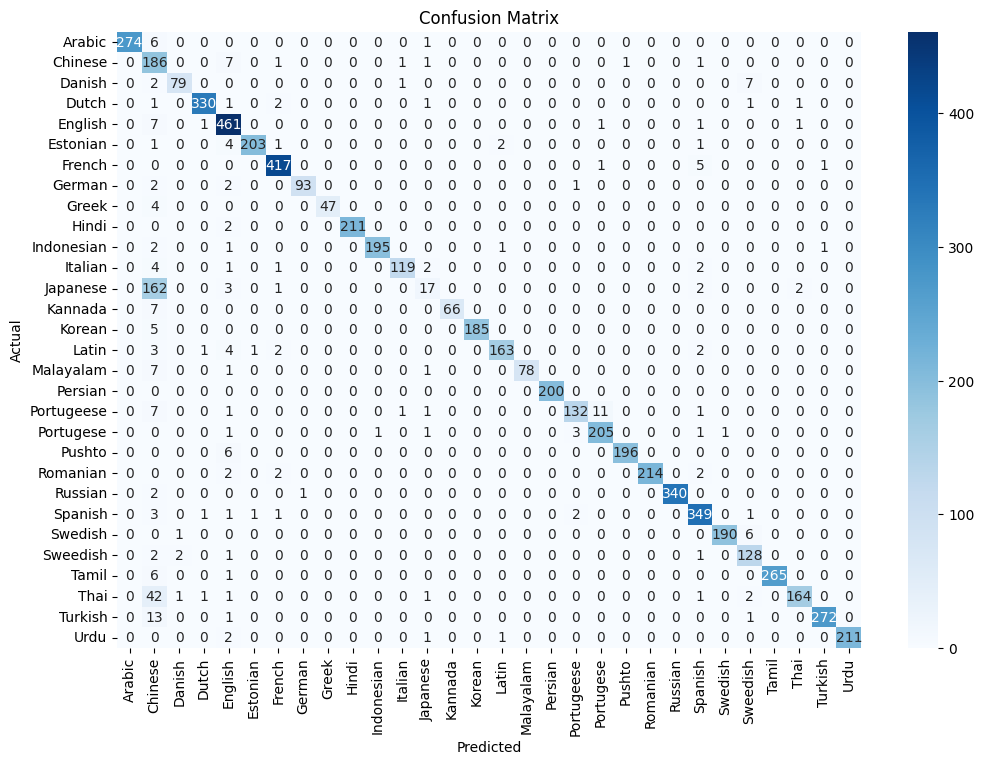

Language: Arabic
  Precision: 1.0000
  Recall: 0.9751
  F1-Score: 0.9874
------------------------------
Language: Chinese
  Precision: 0.3924
  Recall: 0.9394
  F1-Score: 0.5536
------------------------------
Language: Danish
  Precision: 0.9518
  Recall: 0.8876
  F1-Score: 0.9186
------------------------------
Language: Dutch
  Precision: 0.9880
  Recall: 0.9792
  F1-Score: 0.9836
------------------------------
Language: English
  Precision: 0.9147
  Recall: 0.9767
  F1-Score: 0.9447
------------------------------
Language: Estonian
  Precision: 0.9902
  Recall: 0.9575
  F1-Score: 0.9736
------------------------------
Language: French
  Precision: 0.9743
  Recall: 0.9835
  F1-Score: 0.9789
------------------------------
Language: German
  Precision: 0.9894
  Recall: 0.9490
  F1-Score: 0.9688
------------------------------
Language: Greek
  Precision: 1.0000
  Recall: 0.9216
  F1-Score: 0.9592
------------------------------
Language: Hindi
  Precision: 1.0000
  Recall: 0.9906
  F1-Scor

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predicted labels for the test data
y_pred = np.argmax(model_nn.predict(X_test_pad), axis=1)

# Generate a classification report with precision, recall, and F1-score for each language
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=list(label_mapping.keys())))

# Generate the confusion matrix to see how well the model is classifying each language
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(label_mapping.keys()),
            yticklabels=list(label_mapping.keys()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check for individual class performance
# Here, we compute precision, recall, and F1-score for each class
precision_per_class = classification_report(y_test, y_pred, target_names=list(label_mapping.keys()), output_dict=True)

for language, metrics in precision_per_class.items():
    if language not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"Language: {language}")
        print(f"  Precision: {metrics['precision']:.4f}")
        print(f"  Recall: {metrics['recall']:.4f}")
        print(f"  F1-Score: {metrics['f1-score']:.4f}")
        print("-" * 30)


# NN Model Evaluation -- For Each Language

In [27]:
import pandas as pd
import numpy as np
import re
import joblib
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Load the tokenizer, label encoder, and model
tokenizer = joblib.load('tokenizer.joblib')
encoder = joblib.load('label_encoder.joblib')
model = load_model('nn_model.keras')

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces and newlines
    text = re.sub(r'[^\w\s.,!?-]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.strip()  # Remove leading/trailing whitespace
    return text

def preprocess_sentence(sentence, tokenizer, max_length):
    cleaned_sentence = clean_text(sentence)
    sequence = tokenizer.texts_to_sequences([cleaned_sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    return padded_sequence

# Define all sentences
sentences = [
    "الحياة جميلة عندما نعيشها بشغف.",  # Arabic
    "生活在于追求梦想和激情。",  # Chinese
    "Livet er smukt, når vi lever det med passion.",  # Danish
    "Het leven is mooi als we het met passie leven.",  # Dutch
    "Life is beautiful when we live it with passion.",  # English
    "Elu on ilus, kui me elame seda kirega.",  # Estonian
    "La vie est belle quand on la vit avec passion.",  # French
    "Das Leben ist schön, wenn wir es mit Leidenschaft leben.",  # German
    "Η ζωή είναι όμορφη όταν τη ζούμε με πάθος.",  # Greek
    "जीवन सुंदर है जब हम इसे जुनून के साथ जीते हैं।",  # Hindi
    "Hidup itu indah ketika kita menjalani dengan penuh gairah.",  # Indonesian
    "La vita è bella quando la viviamo con passione.",  # Italian
    "人生は情熱を持って生きると美しいです。",  # Japanese
    "ಜೀವನವು ನಾವು ಅದನ್ನು ಉತ್ಸಾಹದಿಂದ ಬದುಕಿದಾಗ ಸುಂದರವಾಗಿದೆ.",  # Kannada
    "삶은 열정을 가지고 살 때 아름답습니다.",  # Korean
    "Vita pulchra est cum eam cum ardore vivimus.",  # Latin
    "ഹായ്, സുഖമാണോ",  # Malayalam
    "زندگی زمانی زیباست که آن را با اشتیاق زندگی کنیم.",  # Persian
    "A vida é bonita quando a vivemos com paixão.",  # Portuguese
    "A vida é bela quando a vivemos com paixão.",  # Portuguese (alternative spelling)
    "ژوند ښکلی دی کله چې موږ دا د جذبې سره ژوند کوو.",  # Pushto
    "Viața este frumoasă atunci când o trăim cu pasiune.",  # Romanian
    "Жизнь прекрасна, когда мы живем её с страстью.",  # Russian
    "La vida es hermosa cuando la vivimos con pasión.",  # Spanish
    "Livet är vackert när vi lever det med passion.",  # Swedish
    "Livet är vackert när vi lever det med passion.",  # Swedish (alternative spelling)
    "வாழ்க்கை அன்புடன் வாழும் போது அழகாக இருக்கும்.",  # Tamil
    "ชีวิตสวยงามเมื่อเรามีความหลงใหลในการใช้ชีวิต",  # Thai
    "Hayat, onu tutku ile yaşadığımızda güzeldir.",  # Turkish
    "زندگی خوب ہے جب ہم اسے جذبے کے ساتھ جیتے ہیں۔"  # Urdu
]

# Define actual language labels
actual_labels = [
    'Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'Estonian', 'French', 'German', 'Greek',
    'Hindi', 'Indonesian', 'Italian', 'Japanese', 'Kannada', 'Korean', 'Latin', 'Malayalam',
    'Persian', 'Portuguese', 'Portuguese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish',
    'Swedish', 'Tamil', 'Thai', 'Turkish', 'Urdu'
]

# Iterate over all sentences
for i, sentence in enumerate(sentences):
    # Preprocess and predict
    input_data = preprocess_sentence(sentence, tokenizer, max_length=100)
    input_data = np.reshape(input_data, (1, 100))  # Ensure batch size of 1

    prediction = model.predict(input_data)
    predicted_class_index = np.argmax(prediction)  # Get the index of the highest probability
    predicted_class_label = encoder.inverse_transform([predicted_class_index])[0]  # Map index to original label

    # Output results
    print(f"Input Sentence: {sentence}")
    print(f"Actual Language: {actual_labels[i]}")
    print(f"Predicted Class Index: {predicted_class_index}")
    print(f"Predicted Class Label: {predicted_class_label}")
    print("="*50)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Input Sentence: الحياة جميلة عندما نعيشها بشغف.
Actual Language: Arabic
Predicted Class Index: 0
Predicted Class Label: Arabic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Input Sentence: 生活在于追求梦想和激情。
Actual Language: Chinese
Predicted Class Index: 1
Predicted Class Label: Chinese
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Input Sentence: Livet er smukt, når vi lever det med passion.
Actual Language: Danish
Predicted Class Index: 2
Predicted Class Label: Danish
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Input Sentence: Het leven is mooi als we het met passie leven.
Actual Language: Dutch
Predicted Class Index: 3
Predicted Class Label: Dutch
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Input Sentence: Life is beautiful when we live it with passion.
Actual Language: English
Predicted Class Index: 4
Predicted Class Label: English
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Input Sentence: Elu on ilus, kui me elame seda kirega.
Actual Language: Estonian
Predicted Class Index: 5
Predicted Class Label: Estonian
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Input Sentence: La vie est belle quand on la vit avec passion.
Actual Language: French
Predicted Class Index: 6
Predicted Class Label: F

#  Long Short-Term Memory(LSTM) Model

In [18]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Flatten

# Define the LSTM Neural Network model
num_classes = len(set(y_train))  # Number of unique classes in the dataset
model_lstm = Sequential(name="My_LSTM_Model",
    layers=[
        Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),  # Embedding layer
        LSTM(128, return_sequences=False),  # LSTM layer
        Dropout(0.5),  # Dropout to prevent overfitting
        Dense(64, activation='relu'),  # Fully connected layer
        Dense(num_classes, activation='softmax')  # Output layer
    ]
)

# Model's name and parameters summary
print(f"Model Name: {model_lstm.name}")
model_lstm.summary()

# Compile the model
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the LSTM model
history_lstm = model_lstm.fit(
    X_train_pad,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)

# Evaluation of the model
loss, accuracy = model_lstm.evaluate(X_test_pad, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Model Name: My_LSTM_Model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "My_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 165s 201ms/step - accuracy: 0.0791 - loss: 3.2138 - val_accuracy: 0.0999 - val_loss: 2.9365
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 166s 206ms/step - accuracy: 0.1042 - loss: 2.9640 - val_accuracy: 0.1542 - val_loss: 2.6914
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 164s 204ms/step - accuracy: 0.1284 - loss: 2.8846 - val_accuracy: 0.2172 - val_loss: 2.4540
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 198s 199ms/step - accuracy: 0.1915 - loss: 2.5471 - val_accuracy: 0.2979 - val_loss: 1.9649
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 202s 199ms/step - accuracy: 0.3381 - loss: 1.7875 - val_accuracy: 0.4163 - val_loss: 1.6933
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 164s 204ms/step - accuracy: 0.5375 - loss: 1.1853 - val_accuracy: 0.8185 - val_loss: 0.5320
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 198s 199ms/step - accuracy: 0.8386 - loss: 0.4795 - val_accuracy: 0.9021 - val_loss: 0.3544
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 162s 201ms/step - accuracy: 0.9183 -

# Save the LSTM Model

In [19]:
model.save('LSTM_Model.h5')
model.save('LSTM_Model.keras')
print("LSTM Model saved Successfully!")

LSTM Model saved Successfully!


# Performance of LSTM Model

201/201 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step
Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       281
     Chinese       0.38      0.90      0.53       198
      Danish       0.89      0.88      0.88        89
       Dutch       0.96      0.98      0.97       337
     English       0.92      0.96      0.94       472
    Estonian       1.00      0.92      0.96       212
      French       0.98      0.98      0.98       424
      German       0.99      0.86      0.92        98
       Greek       0.87      0.90      0.88        51
       Hindi       0.99      1.00      0.99       213
  Indonesian       1.00      0.98      0.99       200
     Italian       0.97      0.91      0.94       129
    Japanese       0.33      0.07      0.11       187
     Kannada       0.97      0.88      0.92        73
      Korean       1.00      0.97      0.98       190
       Latin       0.96      0.95      0.95       176
   Malayalam  

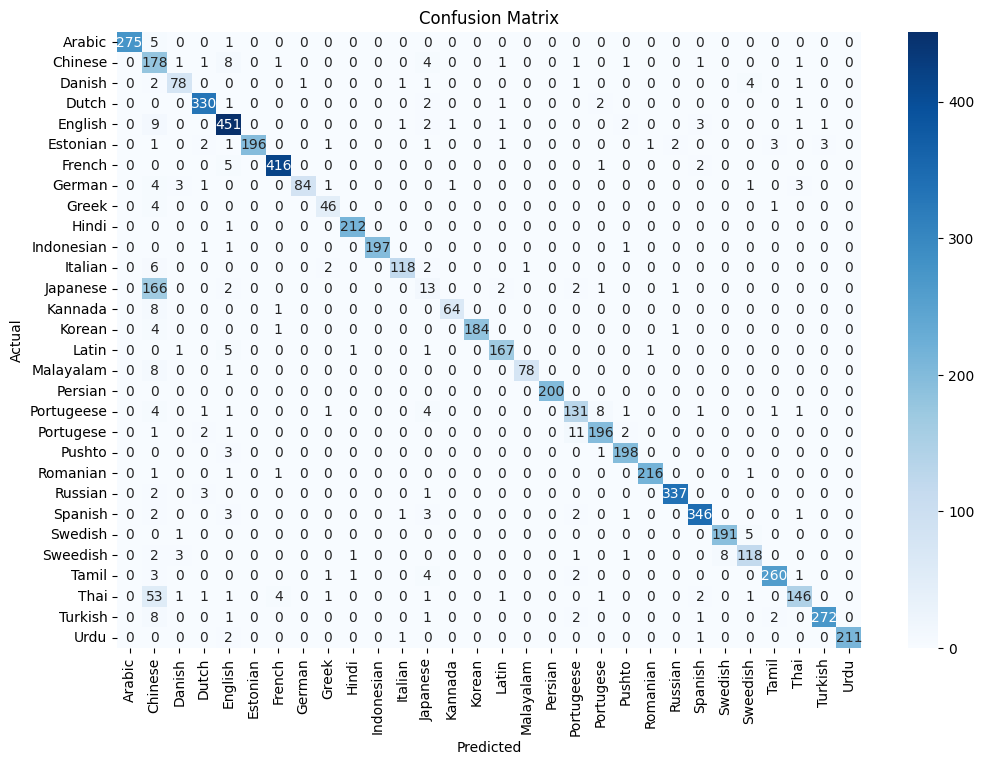

Language: Arabic
  Precision: 1.0000
  Recall: 0.9786
  F1-Score: 0.9892
------------------------------
Language: Chinese
  Precision: 0.3779
  Recall: 0.8990
  F1-Score: 0.5321
------------------------------
Language: Danish
  Precision: 0.8864
  Recall: 0.8764
  F1-Score: 0.8814
------------------------------
Language: Dutch
  Precision: 0.9649
  Recall: 0.9792
  F1-Score: 0.9720
------------------------------
Language: English
  Precision: 0.9204
  Recall: 0.9555
  F1-Score: 0.9376
------------------------------
Language: Estonian
  Precision: 1.0000
  Recall: 0.9245
  F1-Score: 0.9608
------------------------------
Language: French
  Precision: 0.9811
  Recall: 0.9811
  F1-Score: 0.9811
------------------------------
Language: German
  Precision: 0.9882
  Recall: 0.8571
  F1-Score: 0.9180
------------------------------
Language: Greek
  Precision: 0.8679
  Recall: 0.9020
  F1-Score: 0.8846
------------------------------
Language: Hindi
  Precision: 0.9860
  Recall: 0.9953
  F1-Scor

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Language labels updated based on the label mapping
top_preds_labels = [[list(label_mapping.keys())[list(label_mapping.values()).index(i)] for i in row] for row in top_preds]
Language_labels = list(label_mapping.keys())

# Get predicted labels for the test data
y_pred = np.argmax(model_lstm.predict(X_test_pad), axis=1)

# Generate a classification report with precision, recall, and F1-score for each language
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=Language_labels))

# Generate the confusion matrix to see how well the model is classifying each language
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=Language_labels,
            yticklabels=Language_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Check for individual class performance
# Here, we compute precision, recall, and F1-score for each class
precision_per_class = classification_report(y_test, y_pred, target_names=Language_labels, output_dict=True)

# Display precision, recall, and F1-score for each language
for language, metrics in precision_per_class.items():
    if language not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"Language: {language}")
        print(f"  Precision: {metrics['precision']:.4f}")
        print(f"  Recall: {metrics['recall']:.4f}")
        print(f"  F1-Score: {metrics['f1-score']:.4f}")
        print("-" * 30)


# LSTM Model Evaluation - For each Language

In [38]:
import pandas as pd
import numpy as np
import re
import joblib
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Load the tokenizer, label encoder, and model
tokenizer = joblib.load('tokenizer.joblib')
encoder = joblib.load('label_encoder.joblib')
model = load_model('LSTM_Model.keras')  # LSTM model

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces and newlines
    text = re.sub(r'[^\w\s.,!?-]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.strip()  # Remove leading/trailing whitespace
    return text

def preprocess_sentence(sentence, tokenizer, max_length):
    cleaned_sentence = clean_text(sentence)
    sequence = tokenizer.texts_to_sequences([cleaned_sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    # Reshape the padded sequence to 3D array for LSTM: (batch_size, sequence_length, num_features)
    padded_sequence = np.reshape(padded_sequence, (padded_sequence.shape[0], padded_sequence.shape[1], 1))
    return padded_sequence

# Define all sentences
sentences = [
    "الحياة جميلة عندما نعيشها بشغف.",  # Arabic
    "生活在于追求梦想和激情。",  # Chinese
    "Livet er smukt, når vi lever det med passion.",  # Danish
    "Het leven is mooi als we het met passie leven.",  # Dutch
    "Life is beautiful when we live it with passion.",  # English
    "Elu on ilus, kui me elame seda kirega.",  # Estonian
    "La vie est belle quand on la vit avec passion.",  # French
    "Das Leben ist schön, wenn wir es mit Leidenschaft leben.",  # German
    "Η ζωή είναι όμορφη όταν τη ζούμε με πάθος.",  # Greek
    "जीवन सुंदर है जब हम इसे जुनून के साथ जीते हैं।",  # Hindi
    "Hidup itu indah ketika kita menjalani dengan penuh gairah.",  # Indonesian
    "La vita è bella quando la viviamo con passione.",  # Italian
    "人生は情熱を持って生きると美しいです。",  # Japanese
    "ಜೀವನವು ನಾವು ಅದನ್ನು ಉತ್ಸಾಹದಿಂದ ಬದುಕಿದಾಗ ಸುಂದರವಾಗಿದೆ.",  # Kannada
    "삶은 열정을 가지고 살 때 아름답습니다.",  # Korean
    "Vita pulchra est cum eam cum ardore vivimus.",  # Latin
    "ഹായ്, സുഖമാണോ",  # Malayalam
    "زندگی زمانی زیباست که آن را با اشتیاق زندگی کنیم.",  # Persian
    "A vida é bonita quando a vivemos com paixão.",  # Portuguese
    "A vida é bela quando a vivemos com paixão.",  # Portuguese (alternative spelling)
    "ژوند ښکلی دی کله چې موږ دا د جذبې سره ژوند کوو.",  # Pushto
    "Viața este frumoasă atunci când o trăim cu pasiune.",  # Romanian
    "Жизнь прекрасна, когда мы живем её с страстью.",  # Russian
    "La vida es hermosa cuando la vivimos con pasión.",  # Spanish
    "Livet är vackert när vi lever det med passion.",  # Swedish
    "Livet är vackert när vi lever det med passion.",  # Swedish (alternative spelling)
    "வாழ்க்கை அன்புடன் வாழும் போது அழகாக இருக்கும்.",  # Tamil
    "ชีวิตสวยงามเมื่อเรามีความหลงใหลในการใช้ชีวิต",  # Thai
    "Hayat, onu tutku ile yaşadığımızda güzeldir.",  # Turkish
    "زندگی خوب ہے جب ہم اسے جذبے کے ساتھ جیتے ہیں۔"  # Urdu
]

# Define actual language labels
actual_labels = [
    'Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'Estonian', 'French', 'German', 'Greek',
    'Hindi', 'Indonesian', 'Italian', 'Japanese', 'Kannada', 'Korean', 'Latin', 'Malayalam',
    'Persian', 'Portuguese', 'Portuguese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish',
    'Swedish', 'Tamil', 'Thai', 'Turkish', 'Urdu'
]

# Iterate over all sentences
for i, sentence in enumerate(sentences):
    # Preprocess and predict
    input_data = preprocess_sentence(sentence, tokenizer, max_length=100)  # Adjust max_length as needed
    input_data = np.reshape(input_data, (1, input_data.shape[1], 1))  # Ensure batch size of 1 and shape for LSTM

    prediction = model.predict(input_data)
    predicted_class_index = np.argmax(prediction)  # Get the index of the highest probability
    predicted_class_label = encoder.inverse_transform([predicted_class_index])[0]  # Map index to original label

    # Output results
    print(f"Input Sentence: {sentence}")
    print(f"Actual Language: {actual_labels[i]}")
    print(f"Predicted Class Index: {predicted_class_index}")
    print(f"Predicted Class Label: {predicted_class_label}")
    print("="*50)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Input Sentence: الحياة جميلة عندما نعيشها بشغف.
Actual Language: Arabic
Predicted Class Index: 0
Predicted Class Label: Arabic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Input Sentence: 生活在于追求梦想和激情。
Actual Language: Chinese
Predicted Class Index: 1
Predicted Class Label: Chinese
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Input Sentence: Livet er smukt, når vi lever det med passion.
Actual Language: Danish
Predicted Class Index: 2
Predicted Class Label: Danish
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Input Sentence: Het leven is mooi als we het met passie leven.
Actual Language: Dutch
Predicted Class Index: 3
Predicted Class Label: Dutch
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Input Sentence: Life is beautiful when we live it with passion.
Actual Language: English
Predicted Class Index: 4
Predicted Class Label: English
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Input Sentence: Elu on ilus, kui me elame seda kirega.
Actual Language: Estonian
Predicted Class Index: 5
Pre

# Gated Recurrent Unit(GRU) Model

In [42]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, GRU, Flatten

# Define the GRU model
num_classes = len(set(y_train))  # Number of unique classes in the dataset
model_gru = Sequential(name="My_GRU_Model",
    layers=[
        Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),  # Embedding layer
        GRU(128, return_sequences=False),  # GRU layer with 128 units
        Dropout(0.5),  # Dropout to prevent overfitting
        Dense(64, activation='relu'),  # Fully connected layer
        Dense(num_classes, activation='softmax')  # Output layer
    ]
)

# Model's name and parameters summary
print(f"Model Name: {model_gru.name}")
model_gru.summary()

# Compile the model
model_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the GRU model
history_gru = model_gru.fit(
    X_train_pad,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)

# Evaluation of the model
loss, accuracy = model_gru.evaluate(X_test_pad, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Model Name: My_GRU_Model


Model: "My_GRU_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 151s 183ms/step - accuracy: 0.0876 - loss: 3.2583 - val_accuracy: 0.4625 - val_loss: 1.8385
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 205s 187ms/step - accuracy: 0.6171 - loss: 1.2436 - val_accuracy: 0.8873 - val_loss: 0.4065
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 148s 184ms/step - accuracy: 0.8967 - loss: 0.3634 - val_accuracy: 0.9093 - val_loss: 0.3077
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 149s 186ms/step - accuracy: 0.9297 - loss: 0.2193 - val_accuracy: 0.9074 - val_loss: 0.3390
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 192s 174ms/step - accuracy: 0.9396 - loss: 0.1755 - val_accuracy: 0.9157 - val_loss: 0.3210
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 149s 183ms/step - accuracy: 0.9419 - loss: 0.1619 - val_accuracy: 0.9171 - val_loss: 0.3073
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 148s 184ms/step - accuracy: 0.9485 - loss: 0.1527 - val_accuracy: 0.9205 - val_loss: 0.3071
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 203s 185ms/step - accuracy: 0.9512 -

# Save GRU Model

In [43]:
model.save('GRU_Model.h5')
model.save('GRU_Model.keras')
print("GRU Model saved successfully!")

GRU Model saved successfully!


# Performance of GRU Model

201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step
Classification Report - GRU Model:
               precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       281
     Chinese       0.18      0.03      0.05       198
      Danish       0.94      0.87      0.90        89
       Dutch       0.99      0.97      0.98       337
     English       0.89      0.97      0.93       472
    Estonian       0.99      0.95      0.97       212
      French       0.98      0.97      0.97       424
      German       0.97      0.91      0.94        98
       Greek       1.00      0.86      0.93        51
       Hindi       0.99      0.99      0.99       213
  Indonesian       1.00      0.98      0.99       200
     Italian       0.95      0.93      0.94       129
    Japanese       0.37      0.95      0.54       187
     Kannada       0.99      0.90      0.94        73
      Korean       1.00      0.97      0.99       190
       Latin       0.96      0.91      0.94       176
   

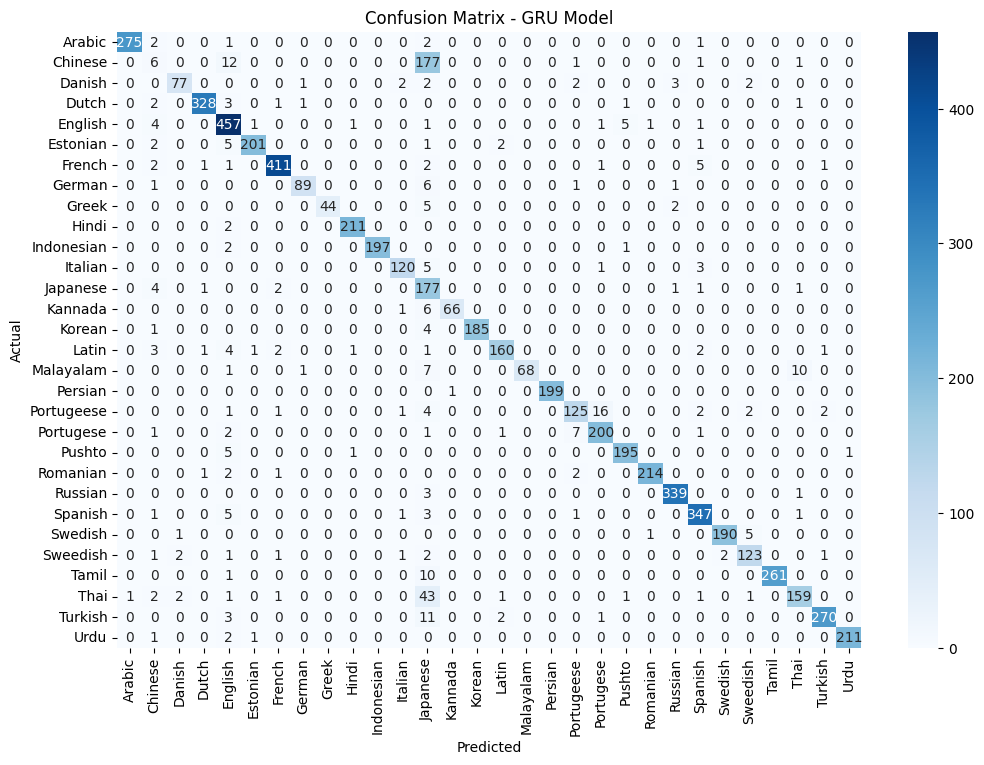

Language: Arabic
  Precision: 0.9964
  Recall: 0.9786
  F1-Score: 0.9874
------------------------------
Language: Chinese
  Precision: 0.1818
  Recall: 0.0303
  F1-Score: 0.0519
------------------------------
Language: Danish
  Precision: 0.9390
  Recall: 0.8652
  F1-Score: 0.9006
------------------------------
Language: Dutch
  Precision: 0.9880
  Recall: 0.9733
  F1-Score: 0.9806
------------------------------
Language: English
  Precision: 0.8943
  Recall: 0.9682
  F1-Score: 0.9298
------------------------------
Language: Estonian
  Precision: 0.9853
  Recall: 0.9481
  F1-Score: 0.9663
------------------------------
Language: French
  Precision: 0.9786
  Recall: 0.9693
  F1-Score: 0.9739
------------------------------
Language: German
  Precision: 0.9674
  Recall: 0.9082
  F1-Score: 0.9368
------------------------------
Language: Greek
  Precision: 1.0000
  Recall: 0.8627
  F1-Score: 0.9263
------------------------------
Language: Hindi
  Precision: 0.9860
  Recall: 0.9906
  F1-Scor

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predicted labels for the test data using the GRU model
y_pred_gru = np.argmax(model_gru.predict(X_test_pad), axis=1)

# Generate a classification report with precision, recall, and F1-score for each language
print("Classification Report - GRU Model:\n",
      classification_report(y_test, y_pred_gru, target_names=Language_labels))

# Generate the confusion matrix to analyze classification performance
cm_gru = confusion_matrix(y_test, y_pred_gru)

# Plot the confusion matrix for the GRU model
plt.figure(figsize=(12, 8))
sns.heatmap(cm_gru, annot=True, fmt='d', cmap='Blues',
            xticklabels=Language_labels,
            yticklabels=Language_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - GRU Model')
plt.show()

# Evaluate individual class performance
precision_per_class_gru = classification_report(
    y_test, y_pred_gru, target_names=Language_labels, output_dict=True
)

# Display precision, recall, and F1-score for each language
for language, metrics in precision_per_class_gru.items():
    if language not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"Language: {language}")
        print(f"  Precision: {metrics['precision']:.4f}")
        print(f"  Recall: {metrics['recall']:.4f}")
        print(f"  F1-Score: {metrics['f1-score']:.4f}")
        print("-" * 30)


# GRU Model Evaluation - For each Language

In [46]:
import pandas as pd
import numpy as np
import re
import joblib
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Load the tokenizer, label encoder, and GRU model
tokenizer = joblib.load('tokenizer.joblib')
encoder = joblib.load('label_encoder.joblib')
model = load_model('GRU_Model.keras')  # Load the GRU model

# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces and newlines
    text = re.sub(r'[^\w\s.,!?-]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.strip()  # Remove leading/trailing whitespace
    return text

# Preprocessing function
def preprocess_sentence(sentence, tokenizer, max_length):
    cleaned_sentence = clean_text(sentence)
    sequence = tokenizer.texts_to_sequences([cleaned_sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    return padded_sequence

# Sentences and labels
sentences = [
    "الحياة جميلة عندما نعيشها بشغف.",  # Arabic
    "生活在于追求梦想和激情。",  # Chinese
    "Livet er smukt, når vi lever det med passion.",  # Danish
    "Het leven is mooi als we het met passie leven.",  # Dutch
    "Life is beautiful when we live it with passion.",  # English
    "Elu on ilus, kui me elame seda kirega.",  # Estonian
    "La vie est belle quand on la vit avec passion.",  # French
    "Das Leben ist schön, wenn wir es mit Leidenschaft leben.",  # German
    "Η ζωή είναι όμορφη όταν τη ζούμε με πάθος.",  # Greek
    "जीवन सुंदर है जब हम इसे जुनून के साथ जीते हैं।",  # Hindi
    "Hidup itu indah ketika kita menjalani dengan penuh gairah.",  # Indonesian
    "La vita è bella quando la viviamo con passione.",  # Italian
    "人生は情熱を持って生きると美しいです。",  # Japanese
    "ಜೀವನವು ನಾವು ಅದನ್ನು ಉತ್ಸಾಹದಿಂದ ಬದುಕಿದಾಗ ಸುಂದರವಾಗಿದೆ.",  # Kannada
    "삶은 열정을 가지고 살 때 아름답습니다.",  # Korean
    "Vita pulchra est cum eam cum ardore vivimus.",  # Latin
    "ഹായ്, സുഖമാണോ",  # Malayalam
    "زندگی زمانی زیباست که آن را با اشتیاق زندگی کنیم.",  # Persian
    "A vida é bonita quando a vivemos com paixão.",  # Portuguese
    "A vida é bela quando a vivemos com paixão.",  # Portuguese (alternative)
    "ژوند ښکلی دی کله چې موږ دا د جذبې سره ژوند کوو.",  # Pushto
    "Viața este frumoasă atunci când o trăim cu pasiune.",  # Romanian
    "Жизнь прекрасна, когда мы живем её с страстью.",  # Russian
    "La vida es hermosa cuando la vivimos con pasión.",  # Spanish
    "Livet är vackert när vi lever det med passion.",  # Swedish
    "Livet är vackert när vi lever det med passion.",  # Swedish (alternative)
    "வாழ்க்கை அன்புடன் வாழும் போது அழகாக இருக்கும்.",  # Tamil
    "ชีวิตสวยงามเมื่อเรามีความหลงใหลในการใช้ชีวิต",  # Thai
    "Hayat, onu tutku ile yaşadığımızda güzeldir.",  # Turkish
    "زندگی خوب ہے جب ہم اسے جذبے کے ساتھ جیتے ہیں۔"  # Urdu
]

actual_labels = [
    'Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'Estonian', 'French', 'German', 'Greek',
    'Hindi', 'Indonesian', 'Italian', 'Japanese', 'Kannada', 'Korean', 'Latin', 'Malayalam',
    'Persian', 'Portuguese', 'Portuguese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish',
    'Swedish', 'Tamil', 'Thai', 'Turkish', 'Urdu'
]

# Model predictions
for i, sentence in enumerate(sentences):
    input_data = preprocess_sentence(sentence, tokenizer, max_length=100)
    input_data = np.reshape(input_data, (1, 100))

    prediction = model.predict(input_data)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = encoder.inverse_transform([predicted_class_index])[0]

    print(f"Input Sentence: {sentence}")
    print(f"Actual Language: {actual_labels[i]}")
    print(f"Predicted Class Index: {predicted_class_index}")
    print(f"Predicted Class Label: {predicted_class_label}")
    print("="*50)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Input Sentence: الحياة جميلة عندما نعيشها بشغف.
Actual Language: Arabic
Predicted Class Index: 0
Predicted Class Label: Arabic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Input Sentence: 生活在于追求梦想和激情。
Actual Language: Chinese
Predicted Class Index: 1
Predicted Class Label: Chinese
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Input Sentence: Livet er smukt, når vi lever det med passion.
Actual Language: Danish
Predicted Class Index: 2
Predicted Class Label: Danish
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Input Sentence: Het leven is mooi als we het met passie leven.
Actual Language: Dutch
Predicted Class Index: 3
Predicted Class Label: Dutch
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Input Sentence: Life is beautiful when we live it with passion.
Actual Language: English
Predicted Class Index: 4
Predicted Class Label: English
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Input Sentence: Elu on ilus, kui me elame seda kirega.
Actual Language: Estonian
Predicted Class Index: 5
Pre

# Comparision of Performances of NN , LSTM , GRU

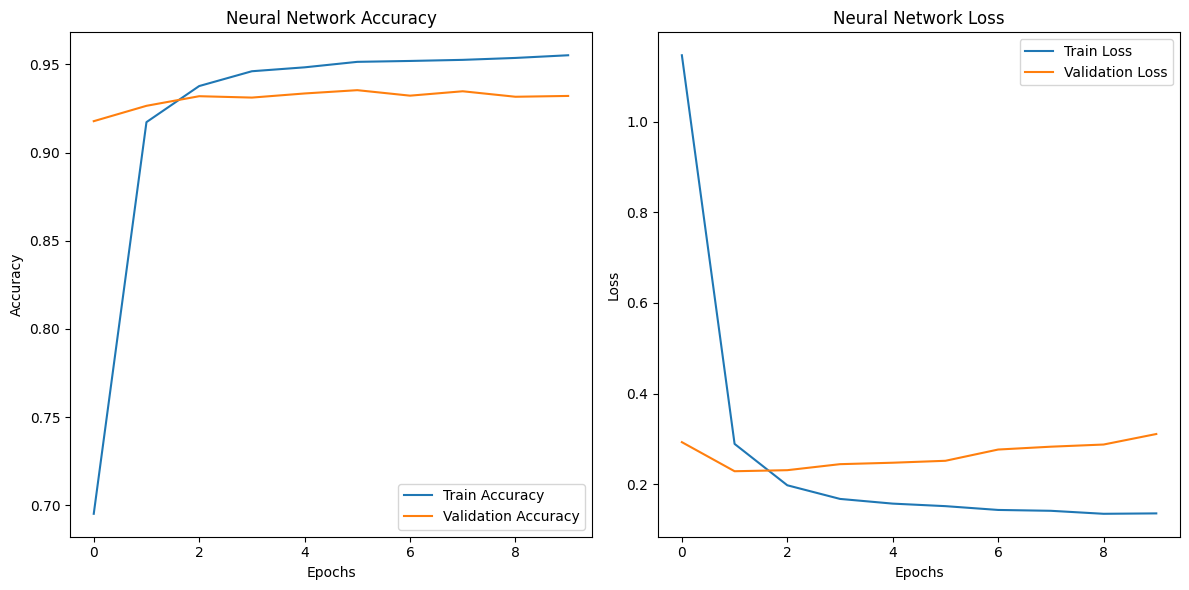

201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


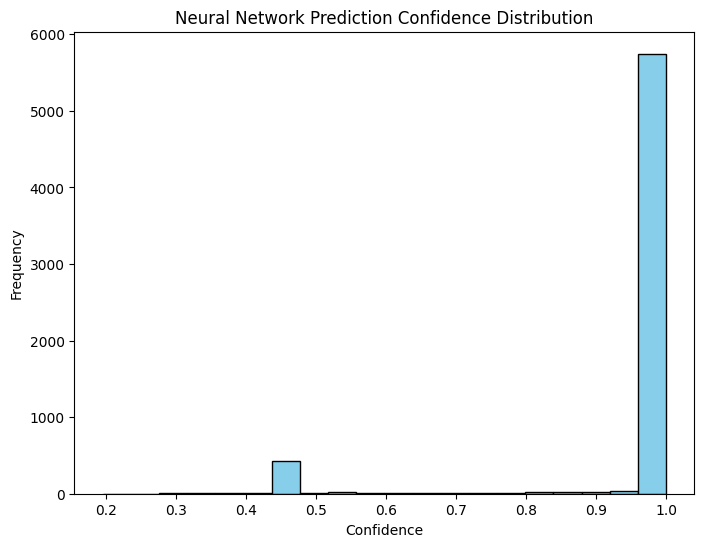

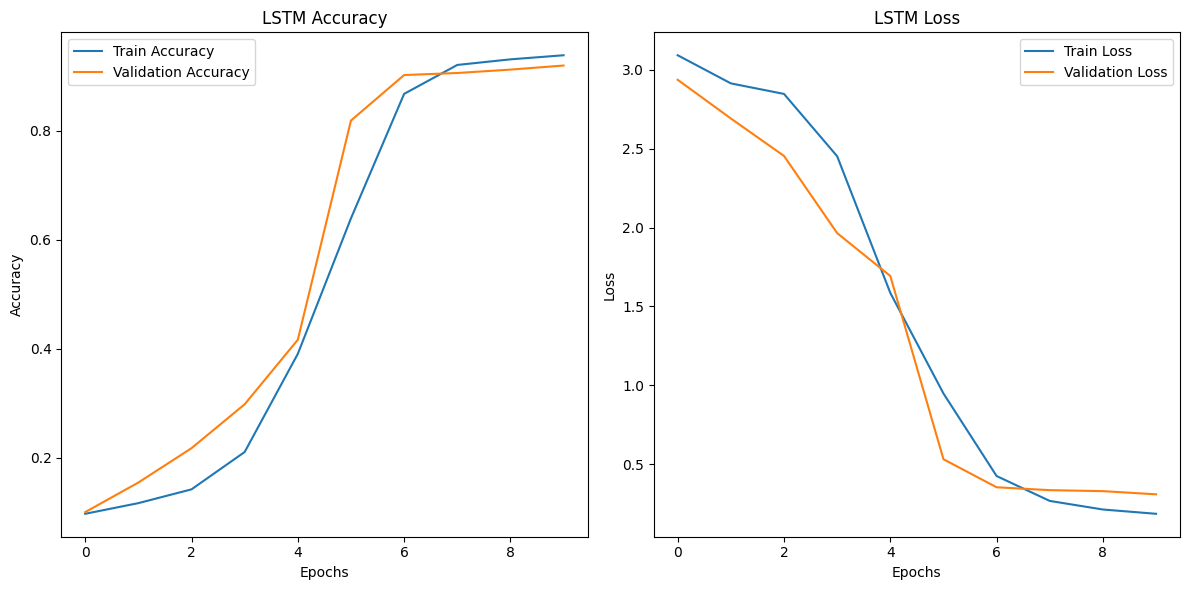

201/201 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step


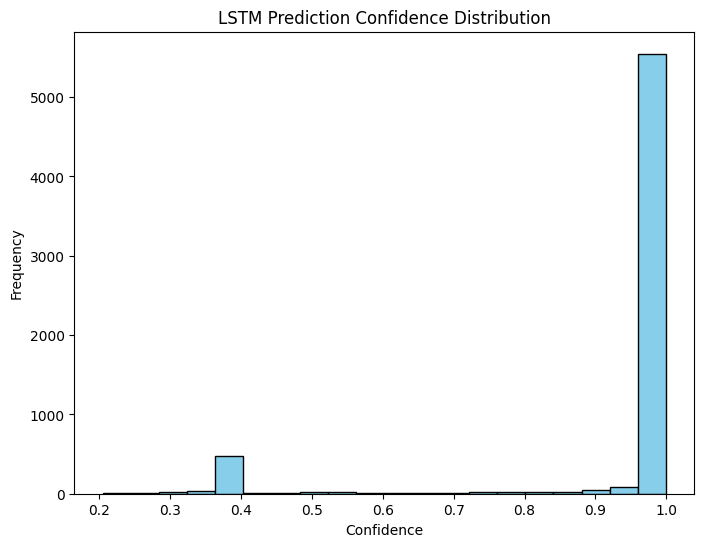

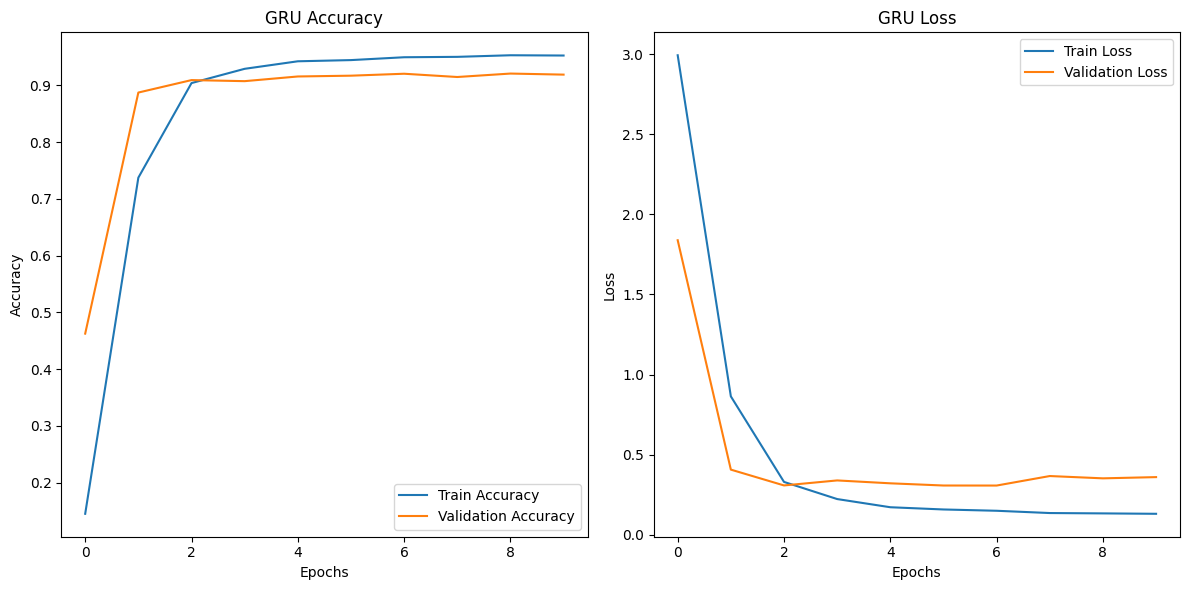

201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step


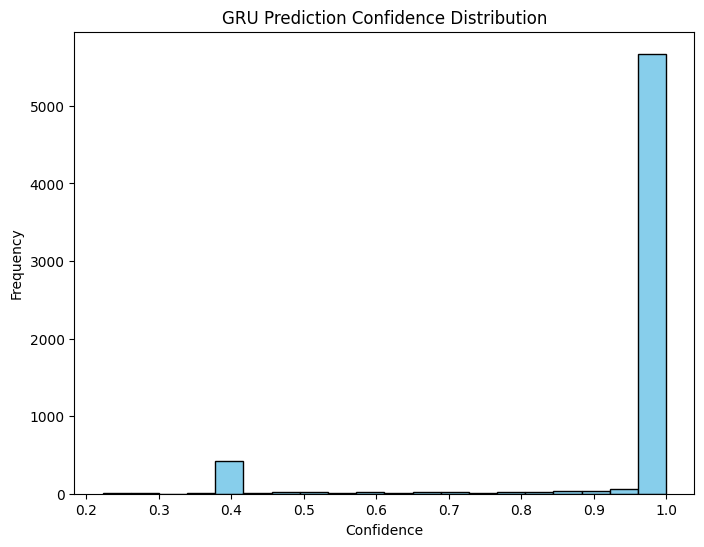


Summary Table:
| Model | Accuracy | Loss |
|-------|----------|------|
| Neural Network | 0.9322 | 0.3109 |
| LSTM | 0.9195 | 0.3098 |
| GRU | 0.9189 | 0.3597 |


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score

# Plot Training and Validation Accuracy and Loss
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Evaluate Model Performance
def evaluate_model(model, X_test, y_test):
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy, loss

# Confidence Distribution
def plot_confidence_distribution(model, title, X_test):
    y_pred_proba = model.predict(X_test)
    confidences = np.max(y_pred_proba, axis=1)
    plt.figure(figsize=(8, 6))
    plt.hist(confidences, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{title} Prediction Confidence Distribution')
    plt.xlabel('Confidence')
    plt.ylabel('Frequency')
    plt.show()

# Example Usage for Models
metrics = {}

# Neural Network
plot_training_history(history_nn, 'Neural Network')
accuracy_nn, loss_nn = evaluate_model(model_nn, X_test_pad, y_test)
plot_confidence_distribution(model_nn, 'Neural Network', X_test_pad)
metrics['Neural Network'] = {'accuracy': accuracy_nn, 'loss': loss_nn}

# LSTM
plot_training_history(history_lstm, 'LSTM')
accuracy_lstm, loss_lstm = evaluate_model(model_lstm, X_test_pad, y_test)
plot_confidence_distribution(model_lstm, 'LSTM', X_test_pad)
metrics['LSTM'] = {'accuracy': accuracy_lstm, 'loss': loss_lstm}

# GRU
plot_training_history(history_gru, 'GRU')
accuracy_gru, loss_gru = evaluate_model(model_gru, X_test_pad, y_test)
plot_confidence_distribution(model_gru, 'GRU', X_test_pad)
metrics['GRU'] = {'accuracy': accuracy_gru, 'loss': loss_gru}

# Summary Table
print("\nSummary Table:")
print("| Model | Accuracy | Loss |")
print("|-------|----------|------|")
for name, metric in metrics.items():
    print(f"| {name} | {metric['accuracy']:.4f} | {metric['loss']:.4f} |")
